In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

admissions = pd.read_csv("E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\scikit-learn\data\\admissions.csv")
admissions[:5]


,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


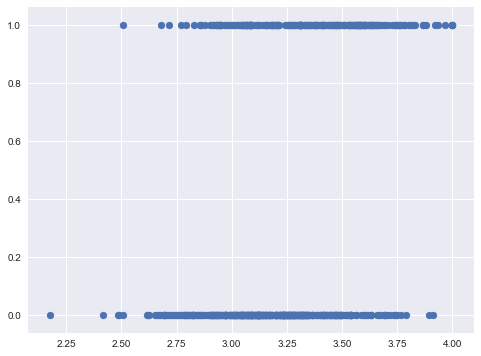

In [6]:
sns.set()
plt.figure(figsize=(8, 6))
plt.scatter(admissions["gpa"], admissions["admit"])
plt.show()


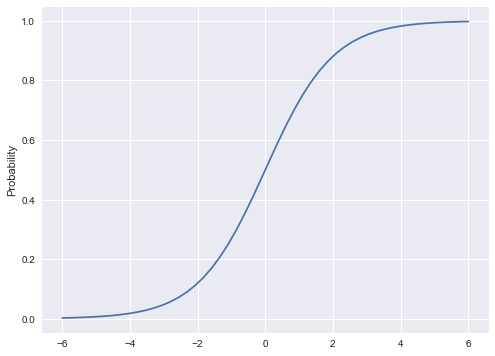

In [8]:
# sigmoid函数
import numpy as np

def logit(x):
    return np.exp(x) / (1 + np.exp(x))

x = np.linspace(-6, 6, 50, dtype=float)
y = logit(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])

# 逻辑回归
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

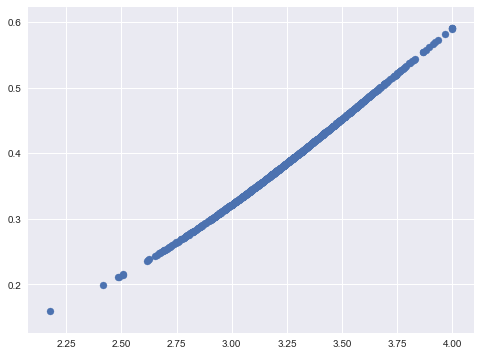

In [10]:
# pred_probs
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
plt.figure(figsize=(8, 6))
plt.scatter(admissions["gpa"], pred_probs[:, 1])
plt.show()


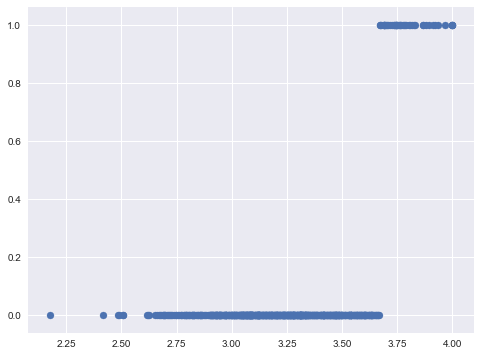

In [11]:
# predict
pre = logistic_model.predict(admissions[["gpa"]])
plt.figure(figsize=(8, 6))
plt.scatter(admissions["gpa"], pre)
plt.show()


In [18]:
# 模型效果评估
admissions["predicted_label"] = pre
admissions["actual_label"] = admissions["admit"]
# admissions[:5]

matches = admissions["predicted_label"] == admissions["actual_label"]
correct_predictions = admissions[matches]
# 简单的计算精度
accuracy = len(correct_predictions) / float(len(admissions))
print(accuracy)


0.6459627329192547


In [27]:
# 模型效果评估，TPR
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
print(true_positives)

true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])
print(true_negatives)

false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])
print(false_negatives)

false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positive_filter])
print(false_positives)


31
385
213
15


In [28]:
# 计算TPR
sensitivity = true_positives / float(true_positives + false_negatives)
print(sensitivity)


0.12704918032786885


In [29]:
# 计算TNR
sensitivity = true_negatives / float(true_negatives + false_positives)
print(sensitivity)


0.9625
